In [2]:
import pandas as pd
import wbgapi as wb
import plotly.graph_objects as go

pd.options.display.float_format = '{:,.2f}'.format

In [ ]:
wb.series.info() # find world bank data by search term and ind the ID
# metadata = wb.series.metadata.get(indicator_code) # load metadata
# metadata
help(wb.data.fetch)

In [3]:
country_code_dict = {
    "ABW": "Aruba",
    "AFE": "Africa Eastern and Southern",
    "AFG": "Afghanistan",
    "AFW": "Africa Western and Central",
    "AGO": "Angola",
    "ALB": "Albania",
    "AND": "Andorra",
    "ARB": "Arab World",
    "ARE": "United Arab Emirates",
    "ARG": "Argentina",
    "ARM": "Armenia",
    "ASM": "American Samoa",
    "ATG": "Antigua and Barbuda",
    "AUS": "Australia",
    "AUT": "Austria",
    "AZE": "Azerbaijan",
    "BDI": "Burundi",
    "BEL": "Belgium",
    "BEN": "Benin",
    "BFA": "Burkina Faso",
    "BGD": "Bangladesh",
    "BGR": "Bulgaria",
    "BHR": "Bahrain",
    "BHS": "Bahamas, The",
    "BIH": "Bosnia and Herzegovina",
    "BLR": "Belarus",
    "BLZ": "Belize",
    "BMU": "Bermuda",
    "BOL": "Bolivia",
    "BRA": "Brazil",
    "BRB": "Barbados",
    "BRN": "Brunei Darussalam",
    "BTN": "Bhutan",
    "BWA": "Botswana",
    "CAF": "Central African Republic",
    "CAN": "Canada",
    "CEB": "Central Europe and the Baltics",
    "CHE": "Switzerland",
    "CHI": "Channel Islands",
    "CHL": "Chile",
    "CHN": "China",
    "CIV": "Cote d'Ivoire",
    "CMR": "Cameroon",
    "COD": "Congo, Dem. Rep.",
    "COG": "Congo, Rep.",
    "COL": "Colombia",
    "COM": "Comoros",
    "CPV": "Cabo Verde",
    "CRI": "Costa Rica",
    "CSS": "Caribbean small states",
    "CUB": "Cuba",
    "CUW": "Curacao",
    "CYM": "Cayman Islands",
    "CYP": "Cyprus",
    "CZE": "Czechia",
    "DEU": "Germany",
    "DJI": "Djibouti",
    "DMA": "Dominica",
    "DNK": "Denmark",
    "DOM": "Dominican Republic",
    "DZA": "Algeria",
    "EAP": "East Asia & Pacific (excluding high income)",
    "EAR": "Early-demographic dividend",
    "EAS": "East Asia & Pacific",
    "ECA": "Europe & Central Asia (excluding high income)",
    "ECS": "Europe & Central Asia",
    "ECU": "Ecuador",
    "EGY": "Egypt, Arab Rep.",
    "EMU": "Euro area",
    "ERI": "Eritrea",
    "ESP": "Spain",
    "EST": "Estonia",
    "ETH": "Ethiopia",
    "EUU": "European Union",
    "FCS": "Fragile and conflict affected situations",
    "FIN": "Finland",
    "FJI": "Fiji",
    "FRA": "France",
    "FRO": "Faroe Islands",
    "FSM": "Micronesia, Fed. Sts.",
    "GAB": "Gabon",
    "GBR": "United Kingdom",
    "GEO": "Georgia",
    "GHA": "Ghana",
    "GIB": "Gibraltar",
    "GIN": "Guinea",
    "GMB": "Gambia, The",
    "GNB": "Guinea-Bissau",
    "GNQ": "Equatorial Guinea",
    "GRC": "Greece",
    "GRD": "Grenada",
    "GRL": "Greenland",
    "GTM": "Guatemala",
    "GUM": "Guam",
    "GUY": "Guyana",
    "HIC": "High income",
    "HKG": "Hong Kong SAR, China",
    "HND": "Honduras",
    "HPC": "Heavily indebted poor countries (HIPC)",
    "HRV": "Croatia",
    "HTI": "Haiti",
    "HUN": "Hungary",
    "IBD": "IBRD only",
    "IBT": "IDA & IBRD total",
    "IDA": "IDA total",
    "IDB": "IDA blend",
    "IDN": "Indonesia",
    "IDX": "IDA only",
    "IMN": "Isle of Man",
    "IND": "India",
    "INX": "Not classified",
    "IRL": "Ireland",
    "IRN": "Iran, Islamic Rep.",
    "IRQ": "Iraq",
    "ISL": "Iceland",
    "ISR": "Israel",
    "ITA": "Italy",
    "JAM": "Jamaica",
    "JOR": "Jordan",
    "JPN": "Japan",
    "KAZ": "Kazakhstan",
    "KEN": "Kenya",
    "KGZ": "Kyrgyz Republic",
    "KHM": "Cambodia",
    "KIR": "Kiribati",
    "KNA": "St. Kitts and Nevis",
    "KOR": "Korea, Rep.",
    "KWT": "Kuwait",
    "LAC": "Latin America & Caribbean (excluding high income)",
    "LAO": "Lao PDR",
    "LBN": "Lebanon",
    "LBR": "Liberia",
    "LBY": "Libya",
    "LCA": "St. Lucia",
    "LCN": "Latin America & Caribbean",
    "LDC": "Least developed countries: UN classification",
    "LIC": "Low income",
    "LIE": "Liechtenstein",
    "LKA": "Sri Lanka",
    "LMC": "Lower middle income",
    "LMY": "Low & middle income",
    "LSO": "Lesotho",
    "LTE": "Late-demographic dividend",
    "LTU": "Lithuania",
    "LUX": "Luxembourg",
    "LVA": "Latvia",
    "MAC": "Macao SAR, China",
    "MAF": "St. Martin (French part)",
    "MAR": "Morocco",
    "MCO": "Monaco",
    "MDA": "Moldova",
    "MDG": "Madagascar",
    "MDV": "Maldives",
    "MEA": "Middle East & North Africa",
    "MEX": "Mexico",
    "MHL": "Marshall Islands",
    "MIC": "Middle income",
    "MKD": "North Macedonia",
    "MLI": "Mali",
    "MLT": "Malta",
    "MMR": "Myanmar",
    "MNA": "Middle East & North Africa (excluding high income)",
    "MNE": "Montenegro",
    "MNG": "Mongolia",
    "MNP": "Northern Mariana Islands",
    "MOZ": "Mozambique",
    "MRT": "Mauritania",
    "MUS": "Mauritius",
    "MWI": "Malawi",
    "MYS": "Malaysia",
    "NAC": "North America",
    "NAM": "Namibia",
    "NCL": "New Caledonia",
    "NER": "Niger",
    "NGA": "Nigeria",
    "NIC": "Nicaragua",
    "NLD": "Netherlands",
    "NOR": "Norway",
    "NPL": "Nepal",
    "NRU": "Nauru",
    "NZL": "New Zealand",
    "OED": "OECD members",
    "OMN": "Oman",
    "OSS": "Other small states",
    "PAK": "Pakistan",
    "PAN": "Panama",
    "PER": "Peru",
    "PHL": "Philippines",
    "PLW": "Palau",
    "PNG": "Papua New Guinea",
    "POL": "Poland",
    "PRE": "Pre-demographic dividend",
    "PRI": "Puerto Rico",
    "PRK": "Korea, Dem. People's Rep.",
    "PRT": "Portugal",
    "PRY": "Paraguay",
    "PSE": "West Bank and Gaza",
    "PSS": "Pacific island small states",
    "PST": "Post-demographic dividend",
    "PYF": "French Polynesia",
    "QAT": "Qatar",
    "ROU": "Romania",
    "RUS": "Russian Federation",
    "RWA": "Rwanda",
    "SAS": "South Asia",
    "SAU": "Saudi Arabia",
    "SDN": "Sudan",
    "SEN": "Senegal",
    "SGP": "Singapore",
    "SLB": "Solomon Islands",
    "SLE": "Sierra Leone",
    "SLV": "El Salvador",
    "SMR": "San Marino",
    "SOM": "Somalia",
    "SRB": "Serbia",
    "SSA": "Sub-Saharan Africa (excluding high income)",
    "SSD": "South Sudan",
    "SSF": "Sub-Saharan Africa",
    "SST": "Small states",
    "STP": "Sao Tome and Principe",
    "SUR": "Suriname",
    "SVK": "Slovak Republic",
    "SVN": "Slovenia",
    "SWE": "Sweden",
    "SWZ": "Eswatini",
    "SXM": "Sint Maarten (Dutch part)",
    "SYC": "Seychelles",
    "SYR": "Syrian Arab Republic",
    "TCA": "Turks and Caicos Islands",
    "TCD": "Chad",
    "TEA": "East Asia & Pacific (IDA & IBRD countries)",
    "TEC": "Europe & Central Asia (IDA & IBRD countries)",
    "TGO": "Togo",
    "THA": "Thailand",
    "TJK": "Tajikistan",
    "TKM": "Turkmenistan",
    "TLA": "Latin America & the Caribbean (IDA & IBRD countries)",
    "TLS": "Timor-Leste",
    "TMN": "Middle East & North Africa (IDA & IBRD countries)",
    "TON": "Tonga",
    "TSA": "South Asia (IDA & IBRD)",
    "TSS": "Sub-Saharan Africa (IDA & IBRD countries)",
    "TTO": "Trinidad and Tobago",
    "TUN": "Tunisia",
    "TUR": "Turkiye",
    "TUV": "Tuvalu",
    "TZA": "Tanzania",
    "UGA": "Uganda",
    "UKR": "Ukraine",
    "UMC": "Upper middle income",
    "URY": "Uruguay",
    "USA": "United States",
    "UZB": "Uzbekistan",
    "VCT": "St. Vincent and the Grenadines",
    "VEN": "Venezuela, RB",
    "VGB": "British Virgin Islands",
    "VIR": "Virgin Islands (U.S.)",
    "VNM": "Viet Nam",
    "VUT": "Vanuatu",
    "WLD": "World",
    "WSM": "Samoa",
    "XKX": "Kosovo",
    "YEM": "Yemen, Rep.",
    "ZAF": "South Africa",
    "ZMB": "Zambia",
    "ZWE": "Zimbabwe",
}

def resolve_country_code(code):
    """resolve country code to country name"""
    region = country_code_dict[code]
    return region

In [7]:
indicator_code=['AG.LND.ARBL.HA.PC']
country_list=['USA', 'DEU']
indicator_code[0]

'AG.LND.ARBL.HA.PC'

In [16]:

def get_data_dict(indicator_code, country_list):
    try:
        data_dict = {}
        for item in wb.data.fetch(indicator_code, country_list, skipAggs=True, numericTimeKeys=True):
                country_code = item['economy']
                value = item['value']
                year = item['time']
                
                if country_code not in data_dict:
                    data_dict[country_code] = {"dates": [], "values": [], "first_value_found": False}
                    
                # Check if the value is a number
                if isinstance(value, (int, float)) and not isinstance(value, bool):
                    data_dict[country_code]["first_value_found"] = True

                # Append data only if the first valid value has been found and value is numeric
                if data_dict[country_code]["first_value_found"] and isinstance(value, (int, float)):
                    data_dict[country_code]["dates"].append(year)
                    data_dict[country_code]["values"].append(value)

                    
            # Sort the dates and values together
        for country_code, data in data_dict.items():
            sorted_data = sorted(zip(data["dates"], data["values"]))
            data_dict[country_code]["dates"], data_dict[country_code]["values"] = map(list, zip(*sorted_data))
        return data_dict
    except wb.APIResponseError as e:
        print(f"APIResponseError: {e}")
        return {}  # Return an empty dictionary or handle as needed
    except Exception as e:
        print(f"Unexpected error: {e}")
        return {}

In [17]:
data = get_data_dict(indicator_code, country_list)
for e in zip(data['DEU']['dates'], data['DEU']['values']):
    print(e)

(1961, 0.166535763923262)
(1962, 0.164604808508344)
(1963, 0.16282012105492)
(1964, 0.161461345063952)
(1965, 0.159984318824933)
(1966, 0.158680817888585)
(1967, 0.156579477710432)
(1968, 0.155664749156063)
(1969, 0.154037337747059)
(1970, 0.152898921723594)
(1971, 0.15278464801469)
(1972, 0.152550974061607)
(1973, 0.151893924681339)
(1974, 0.152214647777648)
(1975, 0.153050159650853)
(1976, 0.154295003826419)
(1977, 0.154439978580297)
(1978, 0.154766529964342)
(1979, 0.154326933230594)
(1980, 0.153662266126797)
(1981, 0.153096804382242)
(1982, 0.15287227667454)
(1983, 0.153171165340613)
(1984, 0.153508886002891)
(1985, 0.153916709112725)
(1986, 0.153884880419353)
(1987, 0.153455964497394)
(1988, 0.152896004266141)
(1989, 0.151730861324507)
(1990, 0.150705571104433)
(1991, 0.144462406879925)
(1992, 0.142227065739912)
(1993, 0.143870419624398)
(1994, 0.144956280301757)
(1995, 0.144898168542244)
(1996, 0.144479331221473)
(1997, 0.144231523484109)
(1998, 0.144782524253267)
(1999, 0.143994

In [28]:
def plot(indicator_code, country_list):
    data_dict = get_data_dict(indicator_code, country_list)
    indicator_name = wb.series.get(indicator_code)["value"]
    
    # Dynamically adjust font size based on the length of the indicator name
    base_font_size = 24
    if len(indicator_name) > 50:
        font_size = max(base_font_size - (len(indicator_name) // 10), 14)
    else:
        font_size = base_font_size

    # Wrap long indicator names by adding line breaks
    max_line_length = 50  # Define a maximum length before wrapping
    wrapped_indicator_name = "<br>".join([indicator_name[i:i+max_line_length] for i in range(0, len(indicator_name), max_line_length)])


    fig = go.Figure()

    # Add traces for each economy
    for economy, data in data_dict.items():
        fig.add_trace(
            go.Scatter(
                x=data["dates"], 
                y=data["values"], 
                mode="lines",
                name=resolve_country_code(economy),
                )
            )

    # Customize layout
    fig.update_layout(
        xaxis_title=None,  
        yaxis_title=None,  
        margin=dict(l=40, r=40, t=90, b=20),
        legend_title_text="",
            hovermode="closest",  # Change how the hover information is displayed
            showlegend=True,  # Show legend
            template="plotly_white",  # Set plot template to white background
            title=dict(
                text=wrapped_indicator_name,
                font=dict(size=font_size),
                x=0.5,
                y=0.96,
                xanchor='center',
                yanchor='top',
            ),
            legend=dict(
                orientation="h",
                xanchor="left",
                yanchor="bottom",
                x=0,
                y=1.01,
                bgcolor='rgba(0,0,0,0)',  # Transparent background
                bordercolor='rgba(0,0,0,0)',  # Transparent border
                groupclick="toggleitem",
                font=dict(family="Courier", size=14, color="black"),
            ),
            xaxis=dict(
                tickmode="linear",
                dtick=5,  # Show every fifth year
            ),
            modebar_orientation="v",
            modebar_remove=["zoom", "pan", "displaylogo"]
    )
    
    return fig


In [29]:
country_list=["DEU"]
indicator_code='AG.LND.ARBL.HA.PC'
plot(indicator_code, country_list)

# holoviews

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
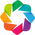

ValueError: Unexpected option 'label' for Curve type across all extensions. Similar options for current extension ('bokeh') are: ['labelled', 'xlabel', 'ylabel'].

In [9]:
import holoviews as hv
from bokeh.models import HoverTool

hv.extension('bokeh')

def plot_hv(indicator_code, country_list):
    data_dict = get_data_dict(indicator_code, country_list)
    indicator_name = wb.series.get(indicator_code)["value"]

    # Create an overlay of curves
    curves = []
    for economy, data in data_dict.items():
        curve = hv.Curve((data["dates"], data["values"]), 'Year', 'Value').opts(
            label=resolve_country_code(economy),
            line_width=2,
            tools=['hover'],  # Enable hover tool
            hover_line_color='red',
        )
        curves.append(curve)

    overlay = hv.Overlay(curves).opts(
        title=indicator_name,
        xlabel='Year',
        ylabel='Value',
        legend_position='top_left',
        show_grid=True,
        height=400,
        width=600,
        fontsize={'title': 19, 'labels': 14, 'ticks': 10, 'legend': 12},
        toolbar='above',  # Show toolbar above the plot
    )

    # Adjust legend settings
    overlay.opts(
        legend_opts=dict(
            background_fill_alpha=0,  # Transparent background
            border_line_alpha=0,  # Transparent border
            orientation="horizontal",
            title=""
        )
    )

    # Customize hover tool
    hover = HoverTool(tooltips=[('Country', '@label'), ('Year', '@Year'), ('Value', '@Value')])
    overlay.opts(hooks=[lambda plot, element: plot.state.add_tools(hover)])

    return overlay

# Example usage
plot_hv('AG.AGR.TRAC.NO', ['USA', 'CAN']).show()
